# Cork South Link Road - PM10 > 100$\mu g/m^{3}$ removed

# Import Necessary Packages

In [2]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# imports necessary for dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.decomposition import FastICA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import FactorAnalysis
# regression algorithms
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.svm import SVR

# metrics for evaluating regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error, explained_variance_score, max_error

from time import process_time

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from yellowbrick.regressor import PredictionError

from sklearn.neural_network import MLPRegressor

# Import Cleaned Data

In [3]:
df = pd.read_csv('./Cork_FileforML.csv', thousands=',', low_memory=False)
# You can also open with Excel and take a look at it.

In [4]:
df = df.dropna(axis=0)

In [5]:
df.head(5)

,Date,Hour,indrain,rain,indtemp,temp,indwetb,wetb,dewpt,vappr,...,w,sun,vis,clht,clamt,Ozone,SO2,NO2,CO,PM10
15568,10/11/2018 16:00,16,0,0.0,0,12.5,0,10.1,7.5,10.4,...,11,0.9,60000,999,2,42.6,3.0,35.1,0.3,33.4
15569,10/11/2018 17:00,17,0,0.0,0,11.9,0,10.0,8.1,10.8,...,11,0.5,50000,999,1,49.2,2.2,20.1,0.2,26
15570,10/11/2018 18:00,18,0,0.0,0,11.1,0,9.7,8.2,10.9,...,81,0.0,40000,999,4,57.0,2.2,9.2,0.2,17
15571,10/11/2018 19:00,19,0,0.0,0,11.3,0,9.9,8.4,11.1,...,11,0.0,30000,999,4,64.4,2.2,6.5,0.2,18
15572,10/11/2018 20:00,20,0,0.0,0,12.0,0,10.7,9.4,11.8,...,11,0.0,25000,18,7,66.6,2.2,5.3,0.2,14


In [6]:
df.tail(5)

,Date,Hour,indrain,rain,indtemp,temp,indwetb,wetb,dewpt,vappr,...,w,sun,vis,clht,clamt,Ozone,SO2,NO2,CO,PM10
25419,31/12/2019 05:00,5,2,0.0,0,8.0,0,7.7,7.3,10.3,...,52,0.0,20000,20,7,59.67,1.9,4.4,0.3,8
25420,31/12/2019 06:00,6,0,0.0,0,8.1,0,7.8,7.4,10.3,...,52,0.0,20000,5,7,57.28,2.1,7.8,0.3,16
25421,31/12/2019 07:00,7,0,0.0,0,8.1,0,7.8,7.5,10.3,...,11,0.0,18000,4,7,51.49,2.1,5.2,0.3,16
25422,31/12/2019 08:00,8,2,0.0,0,8.1,0,7.9,7.6,10.5,...,52,0.0,12000,4,7,51.09,2.1,7.4,0.3,19
25423,31/12/2019 09:00,9,2,0.0,0,7.9,0,7.6,7.3,10.2,...,65,0.0,7000,4,8,51.29,2.4,14.7,0.3,13


In [13]:
df = Cdf.dropna(axis=0)
print("Length of Data is: {}".format(len(Cdf)))

Length of Data is: 5520


In [14]:
df.head(5)

,Date,Hour,indrain,rain,indtemp,temp,indwetb,wetb,dewpt,vappr,...,w,sun,vis,clht,clamt,Ozone,SO2,NO2,CO,PM10
11427,10/11/2018 16:00,16,0,0.0,0,12.5,0,10.1,7.5,10.4,...,11,0.9,60000,999,2,42.6,3.0,35.1,0.3,33.4
11428,10/11/2018 17:00,17,0,0.0,0,11.9,0,10.0,8.1,10.8,...,11,0.5,50000,999,1,49.2,2.2,20.1,0.2,26.0
11429,10/11/2018 18:00,18,0,0.0,0,11.1,0,9.7,8.2,10.9,...,81,0.0,40000,999,4,57.0,2.2,9.2,0.2,17.0
11430,10/11/2018 19:00,19,0,0.0,0,11.3,0,9.9,8.4,11.1,...,11,0.0,30000,999,4,64.4,2.2,6.5,0.2,18.0
11431,10/11/2018 20:00,20,0,0.0,0,12.0,0,10.7,9.4,11.8,...,11,0.0,25000,18,7,66.6,2.2,5.3,0.2,14.0


# Check Datatypes

In [15]:
df.dtypes #Look at the datatypes

Date         object
Hour          int64
indrain       int64
rain        float64
indtemp       int64
temp        float64
indwetb       int64
wetb        float64
dewpt       float64
vappr       float64
rhum          int64
msl         float64
indwdsp       int64
wdsp          int64
indwddir      int64
wddir         int64
ww            int64
w             int64
sun         float64
vis           int64
clht          int64
clamt         int64
Ozone       float64
SO2         float64
NO2         float64
CO          float64
PM10        float64
dtype: object

In [16]:
df['Date'] = df['Date'].astype('datetime64') #Change the datatype of the date column (used for selecting timeframes later)
#df['Ozone'] = df['Ozone'].astype('float')

In [17]:
df.dtypes

Date        datetime64[ns]
Hour                 int64
indrain              int64
rain               float64
indtemp              int64
temp               float64
indwetb              int64
wetb               float64
dewpt              float64
vappr              float64
rhum                 int64
msl                float64
indwdsp              int64
wdsp                 int64
indwddir             int64
wddir                int64
ww                   int64
w                    int64
sun                float64
vis                  int64
clht                 int64
clamt                int64
Ozone              float64
SO2                float64
NO2                float64
CO                 float64
PM10               float64
dtype: object

In [ ]:
#Only take positive values and values of PM10 less than 100 (units in markdown)
Posdf = df[(Cdf['SO2'] >= 0) & (df['Ozone'] >= 0) & (df['NO2'] >= 0) & (df['CO'] >= 0) & (df['PM10'] <= 100) & (df['PM10'] >= 10)]

In [21]:
Posdf.head()

,Date,Hour,indrain,rain,indtemp,temp,indwetb,wetb,dewpt,vappr,...,w,sun,vis,clht,clamt,Ozone,SO2,NO2,CO,PM10
11427,2018-10-11 16:00:00,16,0,0.0,0,12.5,0,10.1,7.5,10.4,...,11,0.9,60000,999,2,42.6,3.0,35.1,0.3,33.4
11428,2018-10-11 17:00:00,17,0,0.0,0,11.9,0,10.0,8.1,10.8,...,11,0.5,50000,999,1,49.2,2.2,20.1,0.2,26.0
11429,2018-10-11 18:00:00,18,0,0.0,0,11.1,0,9.7,8.2,10.9,...,81,0.0,40000,999,4,57.0,2.2,9.2,0.2,17.0
11430,2018-10-11 19:00:00,19,0,0.0,0,11.3,0,9.9,8.4,11.1,...,11,0.0,30000,999,4,64.4,2.2,6.5,0.2,18.0
11431,2018-10-11 20:00:00,20,0,0.0,0,12.0,0,10.7,9.4,11.8,...,11,0.0,25000,18,7,66.6,2.2,5.3,0.2,14.0


In [22]:
Posdf.drop('Date', axis=1, inplace=True)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [23]:
Posdf.drop('indrain', axis=1, inplace=True)

In [24]:
Posdf.drop('indtemp', axis=1, inplace=True)

In [25]:
Posdf.drop('indwetb', axis=1, inplace=True)

In [26]:
Posdf.drop('indwdsp', axis=1, inplace=True)

In [27]:
Posdf.drop('indwddir', axis=1, inplace=True)

In [39]:
Posdf.drop('dewpt', axis=1, inplace=True)

In [40]:
Posdf.drop('vappr', axis=1, inplace=True)

In [41]:
Posdf.drop('rhum', axis=1, inplace=True)

In [42]:
Posdf.drop('ww', axis=1, inplace=True)

In [43]:
Posdf.drop('w', axis=1, inplace=True)

In [44]:
Posdf.drop('clamt', axis=1, inplace=True)

# Adjust Data to avoid zeros

In [26]:
Posdf['Hour'] = Posdf['Hour']+1.00
Posdf['rain'] = Posdf['rain']+1.00
Posdf['temp'] = Posdf['temp']+1.00
Posdf['msl'] = Posdf['msl']/1000
Posdf['NO2'] = Posdf['NO2']+1.00
Posdf['SO2'] = Posdf['SO2']+1.00
Posdf['CO'] = Posdf['CO']+1.00
Posdf['Ozone'] = Posdf['Ozone']+1.00
Posdf['PM10'] = Posdf['PM10']+1.00
Posdf['wdsp'] = Posdf['wdsp']+1.00
Posdf['wddir'] = Posdf['wddir']/360 + 1.00

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

# Create the target dataframes and define functions called in the process of running the algorithms

In [48]:
#Feature setups
Basedf = Posdf[['Hour', 'rain', 'temp', 'msl', 'wdsp', 'wddir', 'Ozone', 'PM10']].copy()
Pollutantdf = Posdf[['Hour', 'rain', 'temp', 'msl', 'wdsp', 'wddir', 'NO2', 'SO2', 'Ozone', 'CO', 'PM10']].copy()
dfnowd = Posdf[['Hour', 'rain', 'temp', 'msl', 'NO2', 'SO2', 'Ozone', 'CO', 'PM10']].copy()

In [49]:
#Calculate the various statistical arbiters using this function
def evaluate_model(X_test, y_test, model):
    
    # compute predictiond for the test set
    _predicted_values = model.predict(X_test)
    # compute metrics
    _mse = mean_squared_error(y_test, _predicted_values)
    _mae = mean_absolute_error(y_test, _predicted_values)
    _r2 = r2_score(y_test, _predicted_values)
    _meae = median_absolute_error(y_test, _predicted_values)
    _evs = explained_variance_score(y_test, _predicted_values)
    _me = max_error(y_test, _predicted_values)      
    return _mse, _mae, _r2, _meae, _evs, _me

In [50]:
#Needed for running the algorithms
class AddColumnNames(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return pd.DataFrame(data=X, columns=self.columns)

In [51]:
#Needed for running the algorithms
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        assert isinstance(X, pd.DataFrame)
        return X[self.columns]

# Functions to conduct Algorithms

# Random Forest

In [52]:
%%time

def RandomForest(Name, N_Year, N, printCV, printgraph, N_Features, Max_Depth, ratio, Addfeature):
    
    Data = N_Year
    
    # store a list with the names of all predictors we'll try PM10 first
    names_all = [c for c in Data if c not in ['PM10']]

    column_list = Data.columns.values.tolist()
    Removed        = column_list.pop(-1)
    
    # define column groups with the same data preparation
    names_outliers = column_list
    print(names_outliers)
    names_no_outliers = list(set(names_all) - set(names_outliers))
    
    y = Data['PM10']
    X = Data.drop('PM10', axis=1).values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, shuffle=True)
    
    preprocess_pipeline = make_pipeline(
    AddColumnNames(columns=names_all),
    FeatureUnion(transformer_list=[
        ("outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()
        )),
        ("no_outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()  
        ))
    ])
)
   
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, shuffle=True)
    #X_train, y_train = X, y
    
    pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), 
                       ('reduce_dim', 'passthrough'),
                        ('regresson', RandomForestRegressor(n_estimators=100))])

    
    #print(len(Data))
    
    
    N_FEATURES_OPTIONS = [N_Features]
    MAX_DEPTH_OPTIONS = [Max_Depth]

    param_grid = [
        {
            'reduce_dim': [PCA(iterated_power=7)],
            'reduce_dim__n_components': N_FEATURES_OPTIONS,
            'regresson__max_depth': MAX_DEPTH_OPTIONS
        },
        {
            'reduce_dim': [RFE(svm.SVR(kernel='linear', gamma='auto')),RFE(LinearRegression())],
            'reduce_dim__n_features_to_select': N_FEATURES_OPTIONS,
            'regresson__max_depth': MAX_DEPTH_OPTIONS
        },
        {
            'reduce_dim': [FastICA( algorithm='deflation')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS,
            'regresson__max_depth': MAX_DEPTH_OPTIONS
        },
        {
            'reduce_dim': [TruncatedSVD(algorithm='randomized'), TruncatedSVD(algorithm='arpack')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS
        },
    ]    

    search = GridSearchCV(pipe, param_grid, cv=10, iid = False, refit=True)
    search.fit(X_train, y_train)

    if printCV == 0:
        print("Best CV score = %0.3f:" % search.best_score_)
        print("Best parameters: ", search.best_params_)
    
        
 
    # store the best params and best model for later use
    RF_best_params = search.best_params_
    RF_best_model = search.best_estimator_
    
    if printgraph == 0:
        model = RandomForestRegressor()
        visualizer = PredictionError(model)

        visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        visualizer.show()                 # Finalize and render the figure
    
    RF_mse, RF_mae, RF_r2, RF_meae, RF_evs, RF_me = evaluate_model(X_test, y_test, RF_best_model)
    
    Title = np.array([Name])
    Range = np.array([N])
    Features = np.array([N_Features])
    Depth = np.array([Max_Depth])
    Split = np.array([ratio])
    Add = np.array([Addfeature])
    MSE  = np.array([RF_mse])
    MAE  = np.array([RF_mae])
    R2   = np.array([RF_r2])
    MEAE = np.array([RF_meae])
    ME   = np.array([RF_me])
    
    #Predictions = model.predict(X_test)
    Modeldf = pd.DataFrame(list(zip(Title, Range, Features, Depth, Split, Add, MSE, MAE, R2, MEAE, ME)), columns =['Algorithm', 'Year', 'N Features', 'Max Depth', 'Test-Train Split', 'Feature Added', 'MSE', 'MAE', 'R2', 'MEAE', 'ME'])
    
    return Modeldf

Wall time: 0 ns


# Gradient Boosting

In [53]:
%%time
def GradientBoosting(Name, N_Year, N, printCV, printgraph, N_Features, Max_Depth, ratio, Addfeature):
    Data = N_Year
    
    # store a list with the names of all predictors we'll try PM10 first
    names_all = [c for c in Data if c not in ['PM10']]

    column_list = Data.columns.values.tolist()
    Removed        = column_list.pop(-1)
    
    # define column groups with the same data preparation
    names_outliers = column_list
    print(names_outliers)
    names_no_outliers = list(set(names_all) - set(names_outliers))
    
    y = Data['PM10']
    X = Data.drop('PM10', axis=1).values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, shuffle=True)
    
    preprocess_pipeline = make_pipeline(
    AddColumnNames(columns=names_all),
    FeatureUnion(transformer_list=[
        ("outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()
        )),
        ("no_outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()  
        ))
    ])
)
   
    #X_train, y_train = X, y
    
    pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), 
                           ('reduce_dim', 'passthrough'),
                           ('regresson', GradientBoostingRegressor())])



    N_FEATURES_OPTIONS = [N_Features]
    MAX_DEPTH_OPTIONS = [Max_Depth]


    param_grid = [
         {
            'reduce_dim': [TruncatedSVD(algorithm='randomized'), TruncatedSVD(algorithm='arpack')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS
        },
        {
            'reduce_dim': [FactorAnalysis(svd_method='randomized'), FactorAnalysis(svd_method='lapack')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS
        },
        {
            'reduce_dim': [PCA(iterated_power=7)],
            'reduce_dim__n_components': N_FEATURES_OPTIONS,
            'regresson__max_depth': MAX_DEPTH_OPTIONS
        },
        {
            'reduce_dim': [RFE(svm.SVR(kernel='linear', gamma='auto')),RFE(LinearRegression())],
            'reduce_dim__n_features_to_select': N_FEATURES_OPTIONS,
            'regresson__max_depth': MAX_DEPTH_OPTIONS
        }


    ]
    search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=10, iid=False, refit=True)
    search.fit(X_train, y_train)
    
    if printCV == 0:
        print("Best CV score = %0.3f:" % search.best_score_)
        print("Best parameters: ", search.best_params_)

    # store the best params and best model for later use
    GB_best_params = search.best_params_
    GB_best_model = search.best_estimator_
    
    if printgraph == 0:
        model = GradientBoostingRegressor()
        visualizer = PredictionError(model)

        visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        visualizer.show()                 # Finalize and render the figure

    GB_mse, GB_mae, GB_r2, GB_meae, GB_evs, GB_me = evaluate_model(X_test, y_test, GB_best_model)
    
    Title = np.array([Name])
    Range = np.array([N])
    Features = np.array([N_Features])
    Depth = np.array([Max_Depth])
    Split = np.array([ratio])
    Add = np.array([Addfeature])
    MSE  = np.array([GB_mse])
    MAE  = np.array([GB_mae])
    R2   = np.array([GB_r2])
    MEAE = np.array([GB_meae])
    ME   = np.array([GB_me])
    
    #Predictions = model.predict(X_test)
    Modeldf = pd.DataFrame(list(zip(Title, Range, Features, Depth, Split, Add, MSE, MAE, R2, MEAE, ME)), columns =['Algorithm', 'Year', 'N Features', 'Max Depth', 'Test-Train Split', 'Feature Added', 'MSE', 'MAE', 'R2', 'MEAE', 'ME'])
    
    return Modeldf

Wall time: 0 ns


# ANN

In [54]:
%%time
def ANN(Name, N_Year, N, printCV, printgraph, N_Features, ratio, Addfeature):
    Data = N_Year
    
    # store a list with the names of all predictors we'll try PM10 first
    names_all = [c for c in Data if c not in ['PM10']]

    column_list = Data.columns.values.tolist()
    Removed        = column_list.pop(-1)
    
    # define column groups with the same data preparation
    names_outliers = column_list
    print(names_outliers)
    names_no_outliers = list(set(names_all) - set(names_outliers))
    
    y = Data['PM10']
    X = Data.drop('PM10', axis=1).values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, shuffle=True)
    
    preprocess_pipeline = make_pipeline(
    AddColumnNames(columns=names_all),
    FeatureUnion(transformer_list=[
        ("outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()
        )),
        ("no_outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()  
        ))
    ])
)
   
    #X_train, y_train = X, y
    
    pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), 
                       ('reduce_dim', 'passthrough'),
                       ('regresson', MLPRegressor ())])



    ALPHA = [0.001, 0.01, 0.1, 1, 10, 100], 
    HIDDEN_LAYER_SIZES = [(6),(11,11),(7,7,7)] 
    SOLVER = ['adam'] 
    ACTIVATION = ['relu','tanh','identity','logistic'] 
    LEARNING_RATE = ['constant','invscaling','adaptive']
    N_FEATURES_OPTIONS = [N_Features]
    MAX_ITER = [500]

    param_grid = [
         {
            'reduce_dim': [TruncatedSVD(algorithm='randomized'), TruncatedSVD(algorithm='arpack')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS
        },
        {
            'reduce_dim': [FactorAnalysis(svd_method='randomized'), FactorAnalysis(svd_method='lapack')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS
        },

    ]
    search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=10, iid=False, refit=True)
    search.fit(X_train, y_train)
    

    if printCV == 0:
        print("Best CV score = %0.3f:" % search.best_score_)
        print("Best parameters: ", search.best_params_)

     # store the best params and best model for later use
    MLP_best_params = search.best_params_
    MLP_best_model = search.best_estimator_
    
    if printgraph == 0:
        model = MLPRegressor()
        visualizer = PredictionError(model)

        visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        visualizer.show()                 # Finalize and render the figure

    MLP_mse, MLP_mae, MLP_r2, MLP_meae, MLP_evs, MLP_me = evaluate_model(X_test, y_test, MLP_best_model)
    
    Title = np.array([Name])
    Range = np.array([N])
    Features = np.array([N_Features])
    #Depth = np.array([Max_Depth])
    Split = np.array([ratio])
    Add = np.array([Addfeature])
    MSE  = np.array([MLP_mse])
    MAE  = np.array([MLP_mae])
    R2   = np.array([MLP_r2])
    MEAE = np.array([MLP_meae])
    ME   = np.array([MLP_me])
    
    #Predictions = model.predict(X_test)
    Modeldf = pd.DataFrame(list(zip(Title, Range, Features, Split, Add, MSE, MAE, R2, MEAE, ME)), columns =['Algorithm', 'Year', 'N Features', 'Test-Train Split', 'Feature Added', 'MSE', 'MAE', 'R2', 'MEAE', 'ME'])
    
    return Modeldf

Wall time: 0 ns


# Linear Regression

In [55]:
%%time
def LRegress(Name, N_Year, N, printCV, printgraph, N_Features, ratio, Addfeature):    
    Data = N_Year
    
    # store a list with the names of all predictors we'll try PM10 first
    names_all = [c for c in Data if c not in ['PM10']]

    column_list = Data.columns.values.tolist()
    Removed        = column_list.pop(-1)
    
    # define column groups with the same data preparation
    names_outliers = column_list
    print(names_outliers)
    names_no_outliers = list(set(names_all) - set(names_outliers))
    
    y = Data['PM10']
    X = Data.drop('PM10', axis=1).values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, shuffle=True)
    
    preprocess_pipeline = make_pipeline(
    AddColumnNames(columns=names_all),
    FeatureUnion(transformer_list=[
        ("outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()
        )),
        ("no_outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()  
        ))
    ])
    )
   
    #X_train, y_train = X, y
    
    pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), 
                       ('reduce_dim', 'passthrough'),
                       ('regresson', LinearRegression())])



    N_FEATURES_OPTIONS = [N_Features]
    NORMALIZE_OPTIONS = [False, True]

    param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=7)],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'regresson__normalize': NORMALIZE_OPTIONS
    },
    {
        'reduce_dim': [RFE(svm.SVR(kernel='linear', gamma='auto')),RFE(LinearRegression())],
        'reduce_dim__n_features_to_select': N_FEATURES_OPTIONS,
        'regresson__normalize': NORMALIZE_OPTIONS
    },
    {
        'reduce_dim': [FastICA( algorithm='deflation')],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'regresson__normalize': NORMALIZE_OPTIONS
    },
    {
        'reduce_dim': [TruncatedSVD(algorithm='randomized'), TruncatedSVD(algorithm='arpack')],
        'reduce_dim__n_components': N_FEATURES_OPTIONS
    }
]

    search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=10, iid=False, refit=True)
    search.fit(X_train, y_train)


    if printCV == 0:
        print("Best CV score = %0.3f:" % search.best_score_)
        print("Best parameters: ", search.best_params_)

     # store the best params and best model for later use
    LR_best_params = search.best_params_
    LR_best_model = search.best_estimator_
    
    if printgraph == 0:
        model = LinearRegression()
        visualizer = PredictionError(model)

        visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        visualizer.show()                 # Finalize and render the figure

    LR_mse, LR_mae, LR_r2, LR_meae, LR_evs, LR_me = evaluate_model(X_test, y_test, LR_best_model)
    
    Title = np.array([Name])
    Range = np.array([N])
    Features = np.array([N_Features])
    #Depth = np.array([Max_Depth])
    Split = np.array([ratio])
    Add = np.array([Addfeature])
    MSE  = np.array([LR_mse])
    MAE  = np.array([LR_mae])
    R2   = np.array([LR_r2])
    MEAE = np.array([LR_meae])
    ME   = np.array([LR_me])
    
    #Predictions = model.predict(X_test)
    Modeldf = pd.DataFrame(list(zip(Title, Range, Features, Split, Add, MSE, MAE, R2, MEAE, ME)), columns =['Algorithm', 'Year', 'N Features', 'Test-Train Split', 'Feature Added', 'MSE', 'MAE', 'R2', 'MEAE', 'ME'])
    
    return Modeldf

Wall time: 0 ns


# SVM

In [56]:
%%time
def SVM(Name, N_Year, N, printCV, printgraph, N_Features, ratio, Addfeature):
    Data = N_Year
    
    # store a list with the names of all predictors we'll try PM10 first
    names_all = [c for c in Data if c not in ['PM10']]
    
    column_list = Data.columns.values.tolist()
    Removed     = column_list.pop(-1)
    
    # define column groups with the same data preparation
    names_outliers = column_list
    print(names_outliers)
    names_no_outliers = list(set(names_all) - set(names_outliers))
    
    y = Data['PM10']
    X = Data.drop('PM10', axis=1).values
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, shuffle=True)
    
    preprocess_pipeline = make_pipeline(
    AddColumnNames(columns=names_all),
    FeatureUnion(transformer_list=[
        ("outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()
        )),
        ("no_outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()  
        ))
    ])
)
   
    #X_train, y_train = X, y
    
    pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), 
                       ('reduce_dim', 'passthrough'),
                       ('regresson', SVR())])



    KERNEL = ['linear']
    C = [300]
    GAMMA = ['auto']
    N_FEATURES_OPTIONS = [N_Features]


    param_grid = [
         {
            'reduce_dim': [TruncatedSVD(algorithm='randomized'), TruncatedSVD(algorithm='arpack')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS
        },
        {
            'reduce_dim': [FactorAnalysis(svd_method='randomized'), FactorAnalysis(svd_method='lapack')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS
        }
    ]
    
    search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=10, iid=False, refit=True)
    search.fit(X_train, y_train)
    

    
    if printCV == 0:
        print("Best CV score = %0.3f:" % search.best_score_)
        print("Best parameters: ", search.best_params_)

     # store the best params and best model for later use
    SVR_best_params = search.best_params_
    SVR_best_model = search.best_estimator_
    
    if printgraph == 0:
        model = SVR()
        visualizer = PredictionError(model)

        visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        visualizer.show()                 # Finalize and render the figure

    SVR_mse, SVR_mae, SVR_r2, SVR_meae, SVR_evs, SVR_me = evaluate_model(X_test, y_test, SVR_best_model)
    
    Title = np.array([Name])
    Range = np.array([N])
    Features = np.array([N_Features])
    #Depth = np.array([Max_Depth])
    Split = np.array([ratio])
    Add = np.array([Addfeature])
    MSE  = np.array([SVR_mse])
    MAE  = np.array([SVR_mae])
    R2   = np.array([SVR_r2])
    MEAE = np.array([SVR_meae])
    ME   = np.array([SVR_me])
    
    #Predictions = model.predict(X_test)
    Modeldf = pd.DataFrame(list(zip(Title, Range, Features, Split, Add, MSE, MAE, R2, MEAE, ME)), columns =['Algorithm', 'Year', 'N Features', 'Test-Train Split', 'Feature Added', 'MSE', 'MAE', 'R2', 'MEAE', 'ME'])
    
    return Modeldf

Wall time: 0 ns


# Run the various permutations of Algorithms

['Hour', 'rain', 'temp', 'msl', 'wdsp', 'wddir', 'Ozone']
Best CV score = 0.385:
Best parameters:  {'reduce_dim': TruncatedSVD(algorithm='arpack', n_components=7, n_iter=5, random_state=None,
             tol=0.0), 'reduce_dim__n_components': 7}


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


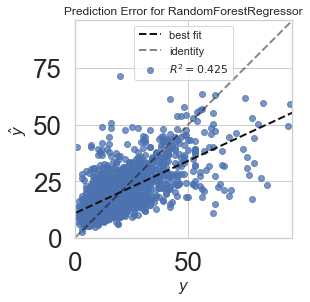

Wall time: 3min 26s


In [57]:
%%time
RF_Base = RandomForest('Random Forest', Basedf, '2018-2019', 0, 0, 7, 12, 0.3, 'None')

['Hour', 'rain', 'temp', 'msl', 'wdsp', 'wddir', 'NO2', 'SO2', 'Ozone', 'CO']
Best CV score = 0.532:
Best parameters:  {'reduce_dim': TruncatedSVD(algorithm='randomized', n_components=10, n_iter=5,
             random_state=None, tol=0.0), 'reduce_dim__n_components': 10}


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


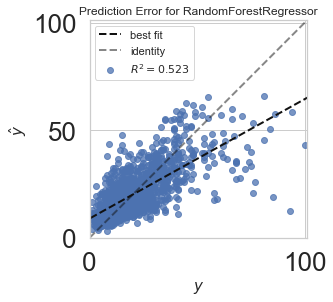

Wall time: 5min 49s


In [58]:
%%time
RF_Pollutant = RandomForest('Random Forest', Pollutantdf, '2018-2019', 0, 0, 10, 12, 0.3, 'NO2, SO2, CO')

['Hour', 'rain', 'temp', 'msl', 'NO2', 'SO2', 'Ozone', 'CO']
Best CV score = 0.501:
Best parameters:  {'reduce_dim': TruncatedSVD(algorithm='randomized', n_components=8, n_iter=5,
             random_state=None, tol=0.0), 'reduce_dim__n_components': 8}


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


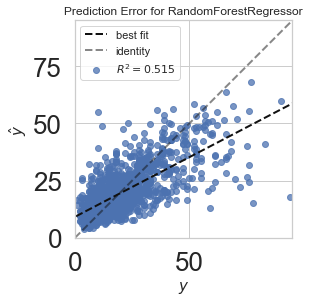

Wall time: 4min 14s


In [59]:
%%time
RF_NOWD = RandomForest('Random Forest', dfnowd, '2018-2019', 0, 0, 8, 12, 0.3, 'NO WIND')

In [76]:
RFTime = ['3m 26s', '5m 49s', '4m 14s']

RFData = pd.concat([RF_Base, RF_Pollutant, RF_NOWD])
RFData['Run Time'] = RFTime 
display(RFData)

,Algorithm,Year,N Features,Max Depth,Test-Train Split,Feature Added,MSE,MAE,R2,MEAE,ME,Run Time
0,Random Forest,2018-2019,7,12,0.3,None,121.894670,7.624066,0.383547,5.280,64.418,3m 26s
0,Random Forest,2018-2019,10,12,0.3,"NO2, SO2, CO",94.243096,6.620102,0.493072,4.805,80.520,5m 49s
0,Random Forest,2018-2019,8,12,0.3,NO WIND,99.405063,6.816733,0.457891,4.835,79.120,4m 14s


['Hour', 'rain', 'temp', 'msl', 'wdsp', 'wddir', 'Ozone']
Best CV score = 0.328:
Best parameters:  {'reduce_dim': PCA(copy=True, iterated_power=7, n_components=7, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), 'reduce_dim__n_components': 7, 'regresson__max_depth': 12}


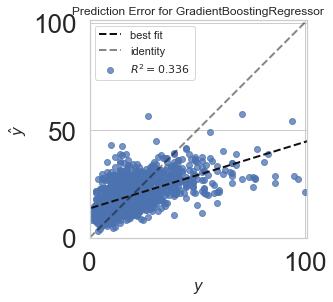

Wall time: 1min 1s


In [61]:
%%time
GB_Base = GradientBoosting('Gradient Boosting', Basedf, '2018-2019', 0, 0, 7, 12, 0.3, 'None')

['Hour', 'rain', 'temp', 'msl', 'wdsp', 'wddir', 'NO2', 'SO2', 'Ozone', 'CO']
Best CV score = 0.464:
Best parameters:  {'reduce_dim': RFE(estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                  gamma='auto', kernel='linear', max_iter=-1, shrinking=True,
                  tol=0.001, verbose=False),
    n_features_to_select=10, step=1, verbose=0), 'reduce_dim__n_features_to_select': 10, 'regresson__max_depth': 12}


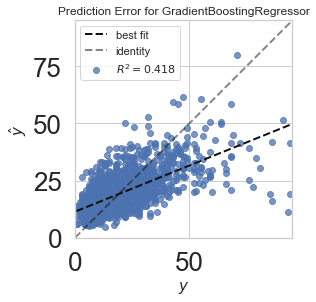

Wall time: 1min 23s


In [62]:
%%time
GB_Pollutant = GradientBoosting('Gradient Boosting', Pollutantdf, '2018-2019', 0, 0, 10, 12, 0.3, 'NO2, SO2, CO')

['Hour', 'rain', 'temp', 'msl', 'NO2', 'SO2', 'Ozone', 'CO']
Best CV score = 0.417:
Best parameters:  {'reduce_dim': RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=8, step=1, verbose=0), 'reduce_dim__n_features_to_select': 8, 'regresson__max_depth': 12}


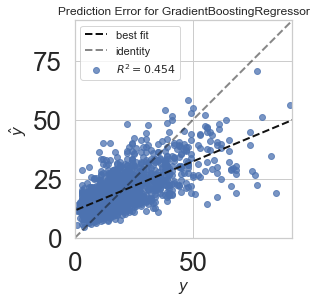

Wall time: 57.6 s


In [63]:
%%time
GB_NOWD = GradientBoosting('Gradient Boosting', dfnowd, '2018-2019', 0, 0, 8, 12, 0.3, 'NO WIND')

In [77]:
GBTime = ['1m 1s', '1m 23s', '58s']

GBData = pd.concat([GB_Base, GB_Pollutant, GB_NOWD])
GBData['Run Time'] = GBTime 
display(GBData)

,Algorithm,Year,N Features,Max Depth,Test-Train Split,Feature Added,MSE,MAE,R2,MEAE,ME,Run Time
0,Gradient Boosting,2018-2019,7,12,0.3,None,126.192397,7.661094,0.323178,5.272208,67.879161,1m 1s
0,Gradient Boosting,2018-2019,10,12,0.3,"NO2, SO2, CO",101.802665,6.506614,0.455842,4.187607,82.598606,1m 23s
0,Gradient Boosting,2018-2019,8,12,0.3,NO WIND,107.519445,7.008613,0.399231,4.751280,67.670763,58s


['Hour', 'rain', 'temp', 'msl', 'wdsp', 'wddir', 'Ozone']


C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best CV score = 0.273:
Best parameters:  {'reduce_dim': TruncatedSVD(algorithm='randomized', n_components=7, n_iter=5,
             random_state=None, tol=0.0), 'reduce_dim__n_components': 7}


C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


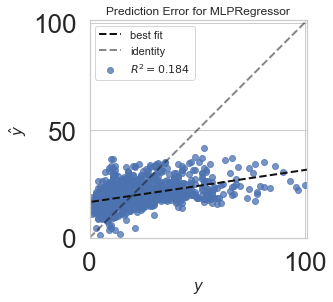

Wall time: 1min 18s


In [65]:
%%time
MLP_Base = ANN('ANN', Basedf, '2018-2019', 0, 0, 7, 0.3, 'None')

['Hour', 'rain', 'temp', 'msl', 'wdsp', 'wddir', 'NO2', 'SO2', 'Ozone', 'CO']


C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best CV score = 0.461:
Best parameters:  {'reduce_dim': TruncatedSVD(algorithm='arpack', n_components=10, n_iter=5, random_state=None,
             tol=0.0), 'reduce_dim__n_components': 10}


C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


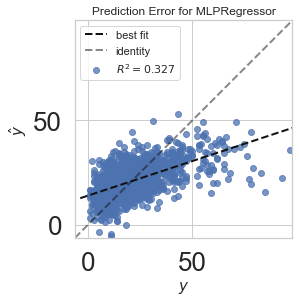

Wall time: 3min 11s


In [66]:
%%time
MLP_Pollutant = ANN('ANN', Pollutantdf, '2018-2019', 0, 0, 10, 0.3, 'NO2, SO2, CO')

['Hour', 'rain', 'temp', 'msl', 'NO2', 'SO2', 'Ozone', 'CO']


C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best CV score = 0.404:
Best parameters:  {'reduce_dim': TruncatedSVD(algorithm='randomized', n_components=8, n_iter=5,
             random_state=None, tol=0.0), 'reduce_dim__n_components': 8}


C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


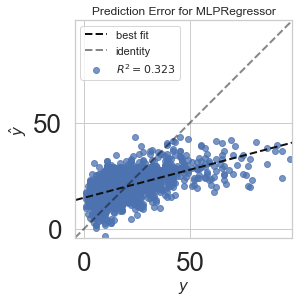

Wall time: 1min 9s


In [67]:
%%time
MLP_NOWD = ANN('ANN', dfnowd, '2017-2019', 0, 0, 8, 0.3, 'NO WIND')

In [78]:
MLPTime = ['1m 18s', '3m 11s', '1m 9s']

MLPData = pd.concat([MLP_Base, MLP_Pollutant, MLP_NOWD])
MLPData['Run Time'] = MLPTime 
display(MLPData)

,Algorithm,Year,N Features,Test-Train Split,Feature Added,MSE,MAE,R2,MEAE,ME,Run Time
0,ANN,2018-2019,7,0.3,None,152.263887,8.690357,0.285866,6.387667,73.676564,1m 18s
0,ANN,2018-2019,10,0.3,"NO2, SO2, CO",99.788855,7.134201,0.445254,5.452623,86.056150,3m 11s
0,ANN,2017-2019,8,0.3,NO WIND,118.146988,7.481185,0.439887,5.596379,78.045040,1m 9s


['Hour', 'rain', 'temp', 'msl', 'wdsp', 'wddir', 'Ozone']
Best CV score = 0.108:
Best parameters:  {'reduce_dim': PCA(copy=True, iterated_power=7, n_components=7, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), 'reduce_dim__n_components': 7, 'regresson__normalize': True}


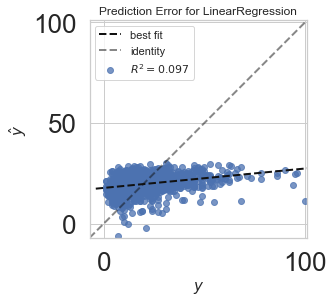

Wall time: 1min 11s


In [69]:
%%time
LR_Base = LRegress('Linear Regression', Basedf, '2018-2019', 0, 0, 7, 0.3, 'None')

['Hour', 'rain', 'temp', 'msl', 'wdsp', 'wddir', 'NO2', 'SO2', 'Ozone', 'CO']
Best CV score = 0.221:
Best parameters:  {'reduce_dim': PCA(copy=True, iterated_power=7, n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), 'reduce_dim__n_components': 10, 'regresson__normalize': True}


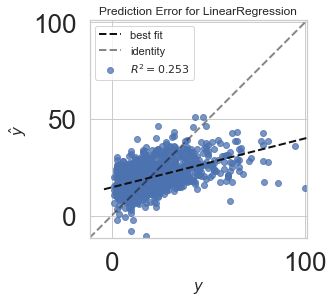

Wall time: 1min 45s


In [70]:
%%time
LR_Pollutant = LRegress('Linear Regression', Pollutantdf, '2018-2019', 0, 0, 10, 0.3, 'NO2, SO2, CO')

['Hour', 'rain', 'temp', 'msl', 'NO2', 'SO2', 'Ozone', 'CO']
Best CV score = 0.215:
Best parameters:  {'reduce_dim': PCA(copy=True, iterated_power=7, n_components=8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), 'reduce_dim__n_components': 8, 'regresson__normalize': False}


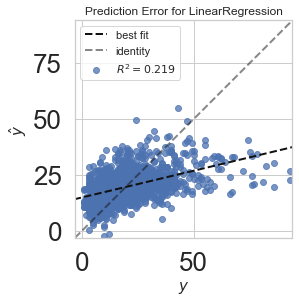

Wall time: 1min 9s


In [71]:
%%time
LR_NOWD = LRegress('Linear Regression', dfnowd, '2018-2019', 0, 0, 8, 0.3, 'NO WIND')

In [79]:
LRTime = ['1m 11s', '1m 45s', '1m 9s']

LRData = pd.concat([LR_Base, LR_Pollutant, LR_NOWD])
LRData['Run Time'] = LRTime 
display(LRData)

,Algorithm,Year,N Features,Test-Train Split,Feature Added,MSE,MAE,R2,MEAE,ME,Run Time
0,Linear Regression,2018-2019,7,0.3,None,156.590396,9.154191,0.126413,7.410409,86.945833,1m 11s
0,Linear Regression,2018-2019,10,0.3,"NO2, SO2, CO",140.634758,8.665442,0.255447,6.722068,83.887206,1m 45s
0,Linear Regression,2018-2019,8,0.3,NO WIND,130.127647,8.344753,0.229238,6.576008,72.961198,1m 9s


['Hour', 'rain', 'temp', 'msl', 'wdsp', 'wddir', 'Ozone']


C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Best CV score = 0.190:
Best parameters:  {'reduce_dim': TruncatedSVD(algorithm='arpack', n_components=7, n_iter=5, random_state=None,
             tol=0.0), 'reduce_dim__n_components': 7}


C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


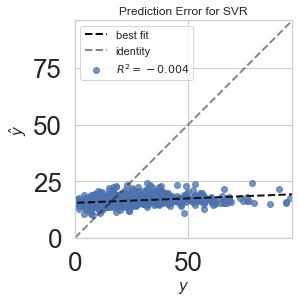

Wall time: 21 s


In [73]:
%%time
SVM_Base = SVM('SVM', Basedf, '2018-2019', 0, 0, 7, 0.3, 'None')

['Hour', 'rain', 'temp', 'msl', 'wdsp', 'wddir', 'NO2', 'SO2', 'Ozone', 'CO']
Best CV score = 0.319:
Best parameters:  {'reduce_dim': FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=10,
               noise_variance_init=None, random_state=0, svd_method='lapack',
               tol=0.01), 'reduce_dim__n_components': 10}


C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


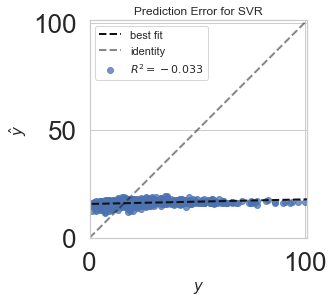

Wall time: 30.1 s


In [74]:
%%time
SVM_Pollutant = SVM('SVM', Pollutantdf, '2018-2019', 0, 0, 10, 0.3, 'NO2, SO2, CO')

['Hour', 'rain', 'temp', 'msl', 'NO2', 'SO2', 'Ozone', 'CO']
Best CV score = 0.312:
Best parameters:  {'reduce_dim': FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=8,
               noise_variance_init=None, random_state=0,
               svd_method='randomized', tol=0.01), 'reduce_dim__n_components': 8}


C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


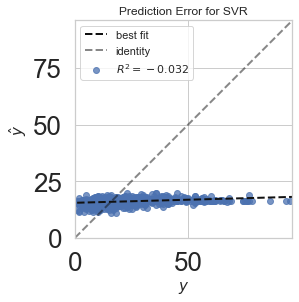

Wall time: 14.5 s


In [75]:
%%time
SVM_NOWD = SVM('SVM', dfnowd, '2018-2019', 0, 0, 8, 0.3, 'NO WIND')

# Combine all the Statistics and save results to a CSV file

In [81]:
CombinedStats = pd.concat([RFData, GBData, MLPData, LRData, SVMData])

print('PM10 > 100 removed')
display(CombinedStats)
print('PM10 > 100 removed')

PM10 > 100 removed


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Algorithm,Feature Added,MAE,ME,MEAE,MSE,Max Depth,N Features,R2,Run Time,Test-Train Split,Year
0,Random Forest,None,7.624066,64.418000,5.280000,121.894670,12.0,7,0.383547,3m 26s,0.3,2018-2019
0,Random Forest,"NO2, SO2, CO",6.620102,80.520000,4.805000,94.243096,12.0,10,0.493072,5m 49s,0.3,2018-2019
0,Random Forest,NO WIND,6.816733,79.120000,4.835000,99.405063,12.0,8,0.457891,4m 14s,0.3,2018-2019
0,Gradient Boosting,None,7.661094,67.879161,5.272208,126.192397,12.0,7,0.323178,1m 1s,0.3,2018-2019
0,Gradient Boosting,"NO2, SO2, CO",6.506614,82.598606,4.187607,101.802665,12.0,10,0.455842,1m 23s,0.3,2018-2019
0,Gradient Boosting,NO WIND,7.008613,67.670763,4.751280,107.519445,12.0,8,0.399231,58s,0.3,2018-2019
0,ANN,None,8.690357,73.676564,6.387667,152.263887,NaN,7,0.285866,1m 18s,0.3,2018-2019
0,ANN,"NO2, SO2, CO",7.134201,86.056150,5.452623,99.788855,NaN,10,0.445254,3m 11s,0.3,2018-2019
0,ANN,NO WIND,7.481185,78.045040,5.596379,118.146988,NaN,8,0.439887,1m 9s,0.3,2017-2019
0,Linear Regression,None,9.154191,86.945833,7.410409,156.590396,NaN,7,0.126413,1m 11s,0.3,2018-2019


PM10 > 100 removed


In [82]:
def AlgorithmTable(Data, Name):
    Dataf = Data
    
    Dataf = Dataf[Data['Algorithm'] == Name]
    
    return Dataf
                 
RF = AlgorithmTable(CombinedStats, 'Random Forest')
GB = AlgorithmTable(CombinedStats, 'Gradient Boosting')
MLP = AlgorithmTable(CombinedStats, 'ANN')
LR = AlgorithmTable(CombinedStats, 'Linear Regression')
SVM = AlgorithmTable(CombinedStats, 'SVM')


display(RF)
display(GB)
display(MLP)
display(LR)
display(SVM)

,Algorithm,Feature Added,MAE,ME,MEAE,MSE,Max Depth,N Features,R2,Run Time,Test-Train Split,Year
0,Random Forest,None,7.624066,64.418,5.280,121.894670,12.0,7,0.383547,3m 26s,0.3,2018-2019
0,Random Forest,"NO2, SO2, CO",6.620102,80.520,4.805,94.243096,12.0,10,0.493072,5m 49s,0.3,2018-2019
0,Random Forest,NO WIND,6.816733,79.120,4.835,99.405063,12.0,8,0.457891,4m 14s,0.3,2018-2019


,Algorithm,Feature Added,MAE,ME,MEAE,MSE,Max Depth,N Features,R2,Run Time,Test-Train Split,Year
0,Gradient Boosting,None,7.661094,67.879161,5.272208,126.192397,12.0,7,0.323178,1m 1s,0.3,2018-2019
0,Gradient Boosting,"NO2, SO2, CO",6.506614,82.598606,4.187607,101.802665,12.0,10,0.455842,1m 23s,0.3,2018-2019
0,Gradient Boosting,NO WIND,7.008613,67.670763,4.751280,107.519445,12.0,8,0.399231,58s,0.3,2018-2019


,Algorithm,Feature Added,MAE,ME,MEAE,MSE,Max Depth,N Features,R2,Run Time,Test-Train Split,Year
0,ANN,None,8.690357,73.676564,6.387667,152.263887,NaN,7,0.285866,1m 18s,0.3,2018-2019
0,ANN,"NO2, SO2, CO",7.134201,86.056150,5.452623,99.788855,NaN,10,0.445254,3m 11s,0.3,2018-2019
0,ANN,NO WIND,7.481185,78.045040,5.596379,118.146988,NaN,8,0.439887,1m 9s,0.3,2017-2019


,Algorithm,Feature Added,MAE,ME,MEAE,MSE,Max Depth,N Features,R2,Run Time,Test-Train Split,Year
0,Linear Regression,None,9.154191,86.945833,7.410409,156.590396,NaN,7,0.126413,1m 11s,0.3,2018-2019
0,Linear Regression,"NO2, SO2, CO",8.665442,83.887206,6.722068,140.634758,NaN,10,0.255447,1m 45s,0.3,2018-2019
0,Linear Regression,NO WIND,8.344753,72.961198,6.576008,130.127647,NaN,8,0.229238,1m 9s,0.3,2018-2019


,Algorithm,Feature Added,MAE,ME,MEAE,MSE,Max Depth,N Features,R2,Run Time,Test-Train Split,Year
0,SVM,None,8.549101,83.293246,5.844912,165.933118,NaN,7,0.202028,21s,0.3,2018-2019
0,SVM,"NO2, SO2, CO",7.910517,79.030066,5.476659,144.369334,NaN,10,0.317284,30s,0.3,2018-2019
0,SVM,NO WIND,7.556473,73.721926,5.170962,126.367275,NaN,8,0.304182,15s,0.3,2018-2019


In [ ]:
CombinedStats.to_csv('Cork PM>100 Results.csv', index=False)